# Introduction à Statsmodels

Statsmodels est un module Python qui fournit des classes et des fonctions pour l'estimation de nombreux modèles statistiques différents, ainsi que pour la réalisation de tests statistiques et l'exploration de données statistiques. Une liste exhaustive de statistiques sur les résultats est disponible pour chaque estimateur. Les résultats sont testés par rapport aux progiciels statistiques existants pour s'assurer qu'ils sont corrects. Le paquet est publié sous la licence Open Source Modified BSD (3-clause). La documentation en ligne est hébergée sur statsmodels.org.

La raison pour laquelle nous l'aborderons dans ce cours est qu'il pourrait vous être très utile plus tard lorsque vous discuterez des données de séries temporelles (typiques de l'analyse financière quantitative).

Prenons un exemple très simple d'utilisation de statsmodels !

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [6]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [7]:
df.index = index

In [8]:
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

Text(0, 0.5, 'REAL GDP')

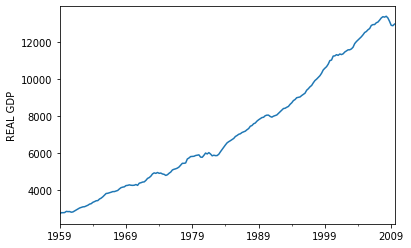

In [9]:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

## Utiliser Statsmodels pour obtenir la tendance
Le filtre Hodrick-Prescott sépare une série temporelle  y_t  en une composante de tendance  τ_t et en une composante de cycle  ζt

$y_t = \tau_t + \zeta_t$

Les composantes sont déterminées en minimisant la fonction de perte quadratique suivante:

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [10]:
# Décomposition du tuple
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [11]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp, Length: 203, dtype: float64

In [12]:
type(gdp_cycle)

pandas.core.series.Series

In [13]:
df["trend"] = gdp_trend

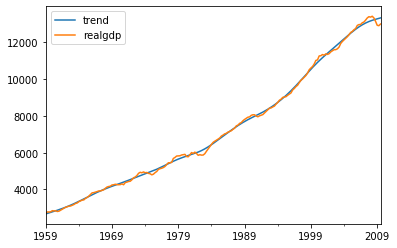

In [14]:
df[['trend','realgdp']].plot()

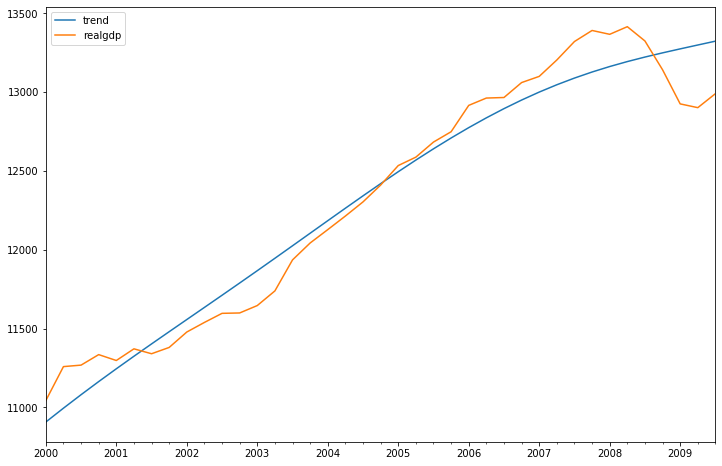

In [15]:
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8))

## Bon Travail!